## CESM2 >100y data analysis

In [1]:
## imports

import sys
import os
import numpy as np
import xarray as xr
import cmocean
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import gridspec
import cartopy
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
# import eofs
# from eofs.xarray import Eof
import cftime
import nc_time_axis

from scipy.stats import kurtosis
from scipy.stats import skew
from scipy.stats import linregress

import mtspec

import datetime
import time
import glob, os
import math
import matplotlib.colors as colors

%load_ext autoreload
%autoreload 2

## Data access:

CESM2 SST data accessed through the ESGF node: https://esgf-node.llnl.gov/search/cmip6/ (last access: 03 May 2021)

In [2]:
def linear_detrend(time_series):
    
    t = range(len(time_series));
    p = np.polyfit(t, time_series, 1)
    l = t*p[0] + p[1];
    detrended = time_series - l;
    
    return detrended

### E280 Nino3.4

In [3]:
file1 = f'models/CESM2/E280/tos_Omon_CESM2_piControl_r1i1p1f1_gr_050001-059912.nc'
file2 = f'models/CESM2/E280/tos_Omon_CESM2_piControl_r1i1p1f1_gr_060001-069912.nc'
file3 = f'models/CESM2/E280/tos_Omon_CESM2_piControl_r1i1p1f1_gr_070001-079912.nc'
file4 = f'models/CESM2/E280/tos_Omon_CESM2_piControl_r1i1p1f1_gr_080001-089912.nc'
file5 = f'models/CESM2/E280/tos_Omon_CESM2_piControl_r1i1p1f1_gr_090001-099912.nc'

minlat = -5;  maxlat = 5; minlon = 190; maxlon = 240;

detrend = 'yes'

# last 100y
ds1 = xr.open_dataset(file5)
a1 = ds1.tos.sel(lat = slice(minlat, maxlat)).sel(lon = slice(minlon, maxlon))
clim1 = a1.groupby('time.month').mean(dim='time')
b1 = a1.groupby('time.month') - clim1
nino100_e280 = b1.mean(dim='lat').mean(dim='lon')
if detrend == 'yes': nino100_e280 = linear_detrend(nino100_e280);

# last 200y
ds2 = xr.open_dataset(file4)
a2 = ds2.tos.sel(lat = slice(minlat, maxlat)).sel(lon = slice(minlon, maxlon))
clim2 = a2.groupby('time.month').mean(dim='time'); clim12 = (clim1 + clim2)/2;
b = a1.groupby('time.month') - clim12; nino1 = b.mean(dim='lat').mean(dim='lon');
b = a2.groupby('time.month') - clim12; nino2 = b.mean(dim='lat').mean(dim='lon');
nino200_e280 = xr.concat([nino2, nino1], dim='time')
if detrend == 'yes': nino200_e280 = linear_detrend(nino200_e280);

# last 300y
ds3 = xr.open_dataset(file3)
a3 = ds3.tos.sel(lat = slice(minlat, maxlat)).sel(lon = slice(minlon, maxlon))
clim3 = a3.groupby('time.month').mean(dim='time'); clim123 = (clim1 + clim2 + clim3)/3;
b = a1.groupby('time.month') - clim123; nino1 = b.mean(dim='lat').mean(dim='lon');
b = a2.groupby('time.month') - clim123; nino2 = b.mean(dim='lat').mean(dim='lon');
b = a3.groupby('time.month') - clim123; nino3 = b.mean(dim='lat').mean(dim='lon');
nino300_e280 = xr.concat([nino3, nino2, nino1], dim='time')
if detrend == 'yes': nino300_e280 = linear_detrend(nino300_e280);

# last 400y
ds4 = xr.open_dataset(file2)
a4 = ds4.tos.sel(lat = slice(minlat, maxlat)).sel(lon = slice(minlon, maxlon))
clim4 = a4.groupby('time.month').mean(dim='time'); clim1234 = (clim1 + clim2 + clim3 + clim4)/4;
b = a1.groupby('time.month') - clim1234; nino1 = b.mean(dim='lat').mean(dim='lon');
b = a2.groupby('time.month') - clim1234; nino2 = b.mean(dim='lat').mean(dim='lon');
b = a3.groupby('time.month') - clim1234; nino3 = b.mean(dim='lat').mean(dim='lon');
b = a4.groupby('time.month') - clim1234; nino4 = b.mean(dim='lat').mean(dim='lon');
nino400_e280 = xr.concat([nino4, nino3, nino2, nino1], dim='time')
if detrend == 'yes': nino400_e280 = linear_detrend(nino400_e280);

# last 500y
ds5 = xr.open_dataset(file1)
a5 = ds5.tos.sel(lat = slice(minlat, maxlat)).sel(lon = slice(minlon, maxlon))
clim5 = a5.groupby('time.month').mean(dim='time'); clim12345 = (clim1 + clim2 + clim3 + clim4 + clim5)/5;
b = a1.groupby('time.month') - clim12345; nino1 = b.mean(dim='lat').mean(dim='lon');
b = a2.groupby('time.month') - clim12345; nino2 = b.mean(dim='lat').mean(dim='lon');
b = a3.groupby('time.month') - clim12345; nino3 = b.mean(dim='lat').mean(dim='lon');
b = a4.groupby('time.month') - clim12345; nino4 = b.mean(dim='lat').mean(dim='lon');
b = a5.groupby('time.month') - clim12345; nino5 = b.mean(dim='lat').mean(dim='lon');
nino500_e280 = xr.concat([nino5, nino4, nino3, nino2, nino1], dim='time')
if detrend == 'yes': nino500_e280 = linear_detrend(nino500_e280);

n1=nino100_e280.std()
n2=nino200_e280.std()
n3=nino300_e280.std()
n4=nino400_e280.std()
n5=nino500_e280.std()
std_e280 = xr.concat([n1,n2,n3,n4,n5], dim='')

/opt/anaconda3/envs/pliomip/lib/python3.8/site-packages/xarray/conventions.py:492: SerializationWarning: variable 'tos' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/opt/anaconda3/envs/pliomip/lib/python3.8/site-packages/xarray/conventions.py:492: SerializationWarning: variable 'tos' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/opt/anaconda3/envs/pliomip/lib/python3.8/site-packages/xarray/conventions.py:492: SerializationWarning: variable 'tos' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/opt/anaconda3/envs/pliomip/lib/python3.8/site-packages/xarray/conventions.py:492: SerializationWarning: variable 'tos' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/opt/anaconda3/envs/pliomip/lib/python3.8/site-packages/xarray/conventions.py:492: SerializationWarn

### Eoi400 Nino3.4

In [5]:
file1  = f'models/CESM2/Eoi400/tos_Omon_CESM2_midPliocene-eoi400_r1i1p1f1_gn_070101-075012.nc'
file1_ = f'models/CESM2/Eoi400/tos_Omon_CESM2_midPliocene-eoi400_r1i1p1f1_gn_075101-080012.nc'
file2  = f'models/CESM2/Eoi400/tos_Omon_CESM2_midPliocene-eoi400_r1i1p1f1_gn_080101-085012.nc'
file2_ = f'models/CESM2/Eoi400/tos_Omon_CESM2_midPliocene-eoi400_r1i1p1f1_gn_085101-090012.nc'
file3  = f'models/CESM2/Eoi400/tos_Omon_CESM2_midPliocene-eoi400_r1i1p1f1_gn_090101-095012.nc'
file3_ = f'models/CESM2/Eoi400/tos_Omon_CESM2_midPliocene-eoi400_r1i1p1f1_gn_095101-100012.nc'
file4  = f'models/CESM2/Eoi400/tos_Omon_CESM2_midPliocene-eoi400_r1i1p1f1_gn_100101-105012.nc'
file4_ = f'models/CESM2/Eoi400/tos_Omon_CESM2_midPliocene-eoi400_r1i1p1f1_gn_105101-110012.nc'
file5  = f'models/CESM2/Eoi400/tos_Omon_CESM2_midPliocene-eoi400_r1i1p1f1_gn_110101-115012.nc'
file5_ = f'models/CESM2/Eoi400/tos_Omon_CESM2_midPliocene-eoi400_r1i1p1f1_gn_115101-120012.nc'

minlat = -5;  maxlat = 5; minlon = 190; maxlon = 240;

detrend = 'yes'

# last 100y
ds1 = xr.open_dataset(file5); ds1_ = xr.open_dataset(file5_); ds=ds1;
a1 = ds1.tos.where(ds.lat>minlat).where(ds.lat<maxlat).where(ds.lon>minlon).where(ds.lon<maxlon)
a1_ = ds1_.tos.where(ds.lat>minlat).where(ds.lat<maxlat).where(ds.lon>minlon).where(ds.lon<maxlon)
clim1 = a1.groupby('time.month').mean(dim='time'); clim1_ = a1_.groupby('time.month').mean(dim='time'); clim100 = (clim1 + clim1_)/2;
b = a1.groupby('time.month') - clim100; nino1 = b.mean(dim='nlat').mean(dim='nlon');
b = a1_.groupby('time.month') - clim100; nino1_ = b.mean(dim='nlat').mean(dim='nlon');
nino100_eoi400 = xr.concat([nino1, nino1_], dim='time')
if detrend == 'yes': nino100_eoi400 = linear_detrend(nino100_eoi400);


# last 200y
ds2 = xr.open_dataset(file4); ds2_ = xr.open_dataset(file4_); ds=ds2;
a2 = ds2.tos.where(ds.lat>minlat).where(ds.lat<maxlat).where(ds.lon>minlon).where(ds.lon<maxlon)
a2_ = ds2_.tos.where(ds.lat>minlat).where(ds.lat<maxlat).where(ds.lon>minlon).where(ds.lon<maxlon)
clim2 = a2.groupby('time.month').mean(dim='time'); clim2_ = a2_.groupby('time.month').mean(dim='time'); clim200 = (clim2 + clim2_)/2;
clim200_ = (clim100 + clim200)/2;
b = a1.groupby('time.month') - clim200_; nino1 = b.mean(dim='nlat').mean(dim='nlon');
b = a1_.groupby('time.month') - clim200_; nino1_ = b.mean(dim='nlat').mean(dim='nlon');
b = a2.groupby('time.month') - clim200_; nino2 = b.mean(dim='nlat').mean(dim='nlon');
b = a2_.groupby('time.month') - clim200_; nino2_ = b.mean(dim='nlat').mean(dim='nlon');
nino200_eoi400 = xr.concat([nino2, nino2_, nino1, nino1_], dim='time')
if detrend == 'yes': nino200_eoi400 = linear_detrend(nino200_eoi400);

# last 300y
ds3 = xr.open_dataset(file3); ds3_ = xr.open_dataset(file3_); ds=ds3;
a3 = ds3.tos.where(ds.lat>minlat).where(ds.lat<maxlat).where(ds.lon>minlon).where(ds.lon<maxlon)
a3_ = ds3_.tos.where(ds.lat>minlat).where(ds.lat<maxlat).where(ds.lon>minlon).where(ds.lon<maxlon)
clim3 = a3.groupby('time.month').mean(dim='time'); clim3_ = a3_.groupby('time.month').mean(dim='time'); clim300 = (clim3 + clim3_)/2;
clim300_ = (clim100 + clim200 + clim300)/3;
b = a1.groupby('time.month') - clim300_; nino1 = b.mean(dim='nlat').mean(dim='nlon');
b = a1_.groupby('time.month') - clim300_; nino1_ = b.mean(dim='nlat').mean(dim='nlon');
b = a2.groupby('time.month') - clim300_; nino2 = b.mean(dim='nlat').mean(dim='nlon');
b = a2_.groupby('time.month') - clim300_; nino2_ = b.mean(dim='nlat').mean(dim='nlon');
b = a3.groupby('time.month') - clim300_; nino3 = b.mean(dim='nlat').mean(dim='nlon');
b = a3_.groupby('time.month') - clim300_; nino3_ = b.mean(dim='nlat').mean(dim='nlon');
nino300_eoi400 = xr.concat([nino3, nino3_, nino2, nino2_, nino1, nino1_], dim='time')
if detrend == 'yes': nino300_eoi400 = linear_detrend(nino300_eoi400);

# last 400y
ds4 = xr.open_dataset(file2); ds4_ = xr.open_dataset(file2_); ds=ds4;
a4 = ds4.tos.where(ds.lat>minlat).where(ds.lat<maxlat).where(ds.lon>minlon).where(ds.lon<maxlon)
a4_ = ds4_.tos.where(ds.lat>minlat).where(ds.lat<maxlat).where(ds.lon>minlon).where(ds.lon<maxlon)
clim4 = a4.groupby('time.month').mean(dim='time'); clim4_ = a4_.groupby('time.month').mean(dim='time'); clim400 = (clim4 + clim4_)/2;
clim400_ = (clim100 + clim200 + clim300 + clim400)/4;
b = a1.groupby('time.month') - clim400_; nino1 = b.mean(dim='nlat').mean(dim='nlon');
b = a1_.groupby('time.month') - clim400_; nino1_ = b.mean(dim='nlat').mean(dim='nlon');
b = a2.groupby('time.month') - clim400_; nino2 = b.mean(dim='nlat').mean(dim='nlon');
b = a2_.groupby('time.month') - clim400_; nino2_ = b.mean(dim='nlat').mean(dim='nlon');
b = a3.groupby('time.month') - clim400_; nino3 = b.mean(dim='nlat').mean(dim='nlon');
b = a3_.groupby('time.month') - clim400_; nino3_ = b.mean(dim='nlat').mean(dim='nlon');
b = a4.groupby('time.month') - clim400_; nino4 = b.mean(dim='nlat').mean(dim='nlon');
b = a4_.groupby('time.month') - clim400_; nino4_ = b.mean(dim='nlat').mean(dim='nlon');
nino400_eoi400 = xr.concat([nino4, nino4_, nino3, nino3_, nino2, nino2_, nino1, nino1_], dim='time')
if detrend == 'yes': nino400_eoi400 = linear_detrend(nino400_eoi400);

# last 500y
ds5 = xr.open_dataset(file1); ds5_ = xr.open_dataset(file1_); ds=ds5;
a5 = ds5.tos.where(ds.lat>minlat).where(ds.lat<maxlat).where(ds.lon>minlon).where(ds.lon<maxlon)
a5_ = ds5_.tos.where(ds.lat>minlat).where(ds.lat<maxlat).where(ds.lon>minlon).where(ds.lon<maxlon)
clim5 = a5.groupby('time.month').mean(dim='time'); clim5_ = a5_.groupby('time.month').mean(dim='time'); clim500 = (clim5 + clim5_)/2;
clim500_ = (clim100 + clim200 + clim300 + clim400 + clim500)/5;
b = a1.groupby('time.month') - clim500_; nino1 = b.mean(dim='nlat').mean(dim='nlon');
b = a1_.groupby('time.month') - clim500_; nino1_ = b.mean(dim='nlat').mean(dim='nlon');
b = a2.groupby('time.month') - clim500_; nino2 = b.mean(dim='nlat').mean(dim='nlon');
b = a2_.groupby('time.month') - clim500_; nino2_ = b.mean(dim='nlat').mean(dim='nlon');
b = a3.groupby('time.month') - clim500_; nino3 = b.mean(dim='nlat').mean(dim='nlon');
b = a3_.groupby('time.month') - clim500_; nino3_ = b.mean(dim='nlat').mean(dim='nlon');
b = a4.groupby('time.month') - clim500_; nino4 = b.mean(dim='nlat').mean(dim='nlon');
b = a4_.groupby('time.month') - clim500_; nino4_ = b.mean(dim='nlat').mean(dim='nlon');
b = a5.groupby('time.month') - clim500_; nino5 = b.mean(dim='nlat').mean(dim='nlon');
b = a5_.groupby('time.month') - clim500_; nino5_ = b.mean(dim='nlat').mean(dim='nlon');
nino500_eoi400 = xr.concat([nino5, nino5_, nino4, nino4_, nino3, nino3_, nino2, nino2_, nino1, nino1_], dim='time')
if detrend == 'yes': nino500_eoi400 = linear_detrend(nino500_eoi400);

n1=nino100_eoi400.std()
n2=nino200_eoi400.std()
n3=nino300_eoi400.std()
n4=nino400_eoi400.std()
n5=nino500_eoi400.std()
std_eoi400 = xr.concat([n1,n2,n3,n4,n5], dim='')

/opt/anaconda3/envs/pliomip/lib/python3.8/site-packages/xarray/conventions.py:492: SerializationWarning: variable 'tos' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/opt/anaconda3/envs/pliomip/lib/python3.8/site-packages/xarray/conventions.py:492: SerializationWarning: variable 'tos' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/opt/anaconda3/envs/pliomip/lib/python3.8/site-packages/xarray/conventions.py:492: SerializationWarning: variable 'tos' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/opt/anaconda3/envs/pliomip/lib/python3.8/site-packages/xarray/conventions.py:492: SerializationWarning: variable 'tos' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


In [7]:
std2_e280 = np.zeros(len(yearlist))
std2_eoi400 = np.zeros(len(yearlist))
N = 1200
for i in range(len(yearlist)):
    std2_e280[i] = nino500_e280[(i*N):((i+1)*N-1)].std()
    std2_eoi400[i] = nino500_eoi400[(i*N):((i+1)*N-1)].std()

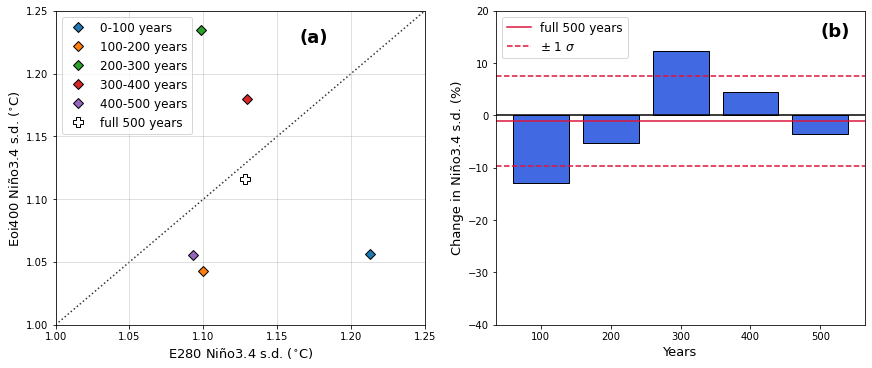

In [26]:
yearlist = ['100', '200', '300', '400', '500'];
legends = ['0-100', '100-200', '200-300', '300-400', '400-500']

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 5), constrained_layout=True)

lims = [1.0, 1.25]
# ax[0].plot(std_e280, std_eoi400, 'k-')
# for j in range(len(yearlist)):
#     ax[0].plot(std_e280[j], std_eoi400[j], 'D', label = f'{yearlist[j]} years', markersize = 7, markeredgecolor ='k')
# ax[0].plot(std2_e280[:-1], std2_eoi400[:-1], 'D', markersize = 7, markeredgecolor ='k', color='tab:blue')
# ax[0].plot(lims, lims, 'k:', alpha=0.8, zorder = -1)
# ax[0].set_xlim(lims); ax[0].set_ylim(lims);
# ax[0].set_xlabel(r'E280 Niño3.4 s.d. ($^{\circ}$C)', fontsize=13)
# ax[0].set_ylabel(r'Eoi400 Niño3.4 s.d. ($^{\circ}$C)',fontsize=13)
# ax[0].legend(loc = 'upper left', fontsize = 12)
# ax[0].grid(alpha=0.5);
ax[0].text(1.165, 1.225, '(a)', fontsize = 18, fontweight = 'bold')
# ax[0].text(1.06, 1.045, '100y', fontsize = 13)
# ax[0].text(1.135, 1.105, '500y', fontsize = 13)

for j in range(len(yearlist)):
    ax[0].plot(std2_e280[j], std2_eoi400[j], 'D', label = f'{legends[j]} years', markersize = 7, markeredgecolor ='k')
ax[0].plot(std_e280[-1], std_eoi400[-1], 'P', markersize = 10, markeredgecolor ='k', color='w', label='full 500 years')
ax[0].plot(lims, lims, 'k:', alpha=0.8, zorder = -1)
ax[0].set_xlim(lims); ax[0].set_ylim(lims);
ax[0].set_xlabel(r'E280 Niño3.4 s.d. ($^{\circ}$C)', fontsize=13)
ax[0].set_ylabel(r'Eoi400 Niño3.4 s.d. ($^{\circ}$C)',fontsize=13)
ax[0].legend(loc = 'upper left', fontsize = 12)
ax[0].grid(alpha=0.5);

years = [100, 200, 300, 400, 500]
# xlims = [75, 525]
# ax[1].plot(years, 100*std_e280/std_e280[-1], 'rx--', markersize = 7, label = 'E280')
# ax[1].plot(years, 100*std_eoi400/std_eoi400[-1], 'bo--', markersize = 7, label = 'Eoi400')
# ax[1].plot(xlims, [100,100], 'k:', alpha=0.8, zorder = -1)
# ax[1].set_ylim([93, 107]); ax[1].set_xlim(xlims)
# ax[1].set_xlabel('Years analysed', fontsize=13)
# ax[1].set_ylabel(r'Niño3.4 s.d. deviation (%)', fontsize=13)
# ax[1].legend(loc = 'upper right', fontsize = 12)
# ax[1].set_xticks(years)
# ax[1].set_xticklabels(years)
# ax[1].text(340, 105.5, '(b)', fontsize = 18, fontweight = 'bold')

perc = 100*(std2_eoi400 - std2_e280)/std2_e280
perc500 = 100*(std_eoi400[-1] - std_e280[-1])/std_e280[-1]

ax[1].bar(yearlist, perc, edgecolor='k', color='royalblue')
ax[1].set_xlabel('Years', fontsize=13)
ax[1].set_ylabel('Change in Niño3.4 s.d. (%)', fontsize=13)
ax[1].set_ylim([-40, 20])
ax[1].axhline([0],color='k')
ax[1].axhline([perc500], color='crimson', label='full 500 years')
ax[1].axhline([perc500+np.std(perc)], color='crimson', linestyle = '--', label='$\pm$ 1 $\sigma$')
ax[1].axhline([perc500-np.std(perc)], color='crimson', linestyle = '--')

# ax[1].set_xticks(years)
# ax[1].set_xticklabels(years)
ax[1].set_xlabel('Years', fontsize=13)
ax[1].legend(loc = 'upper left', fontsize = 12)
ax[1].text(4, 15, '(b)', fontsize = 18, fontweight = 'bold')

plt.savefig('figures/appendixfigure5v2.pdf', bbox_inches='tight')

In [45]:
np.std(perc)

8.644168570450642

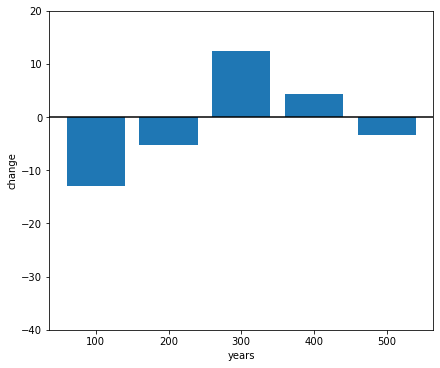

In [18]:
std2_e280 = np.zeros(len(yearlist))
std2_eoi400 = np.zeros(len(yearlist))
N = 1200
for i in range(len(yearlist)):
    std2_e280[i] = nino500_e280[(i*N):((i+1)*N-1)].std()
    std2_eoi400[i] = nino500_eoi400[(i*N):((i+1)*N-1)].std()


yearlist = ['100', '200', '300', '400', '500'];


fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (6, 5), constrained_layout=True)

perc = 100*(std2_eoi400 - std2_e280)/std2_e280

ax.bar(yearlist, perc)
ax.set_xlabel('years')
ax.set_ylabel('change')
ax.set_ylim([-40, 20])
ax.axhline([0],color='k')

[Text(100, 0, '100'),
 Text(200, 0, '200'),
 Text(300, 0, '300'),
 Text(400, 0, '400'),
 Text(500, 0, '500')]

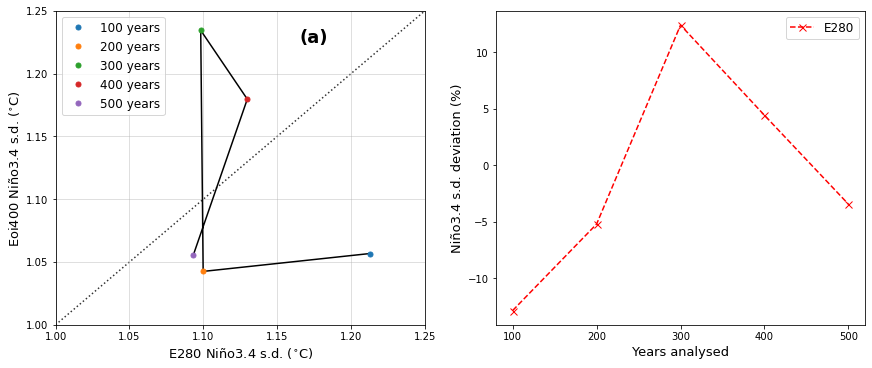

In [181]:
std2_e280 = np.zeros(len(yearlist))
std2_eoi400 = np.zeros(len(yearlist))
N = 1200
for i in range(len(yearlist)):
    std2_e280[i] = nino500_e280[(i*N):((i+1)*N-1)].std()
    std2_eoi400[i] = nino500_eoi400[(i*N):((i+1)*N-1)].std()


yearlist = ['100', '200', '300', '400', '500'];

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 5), constrained_layout=True)

lims = [1.0, 1.25]
ax[0].plot(std2_e280, std2_eoi400, 'k-')
for j in range(len(yearlist)):
    ax[0].plot(std2_e280[j], std2_eoi400[j], '.', label = f'{yearlist[j]} years', markersize = 10)
ax[0].plot(lims, lims, 'k:', alpha=0.8, zorder = -1)
ax[0].set_xlim(lims); ax[0].set_ylim(lims);
ax[0].set_xlabel(r'E280 Niño3.4 s.d. ($^{\circ}$C)', fontsize=13)
ax[0].set_ylabel(r'Eoi400 Niño3.4 s.d. ($^{\circ}$C)',fontsize=13)
ax[0].legend(loc = 'upper left', fontsize = 12)
ax[0].grid(alpha=0.5);
ax[0].text(1.165, 1.225, '(a)', fontsize = 18, fontweight = 'bold')

years = [100, 200, 300, 400, 500]
xlims = [75, 525]
ax[1].plot(years, 100*(std2_eoi400-std2_e280)/std2_e280, 'rx--', markersize = 7, label = 'E280')
# ax[1].plot(years, std2_eoi400, 'bo--', markersize = 7, label = 'Eoi400')
# ax[1].plot(xlims, [100,100], 'k:', alpha=0.8, zorder = -1)
# ax[1].set_ylim([93, 107]); ax[1].set_xlim(xlims)
ax[1].set_xlabel('Years analysed', fontsize=13)
ax[1].set_ylabel(r'Niño3.4 s.d. deviation (%)', fontsize=13)
ax[1].legend(loc = 'upper right', fontsize = 12)
ax[1].set_xticks(years)
ax[1].set_xticklabels(years)
# ax[1].text(340, 105.5, '(b)', fontsize = 18, fontweight = 'bold')

# plt.savefig('figures/appendixfigure5.pdf', bbox_inches='tight')

## Spectral analysis

In [28]:
from defs import MT_spectrum, Confidence_intervals

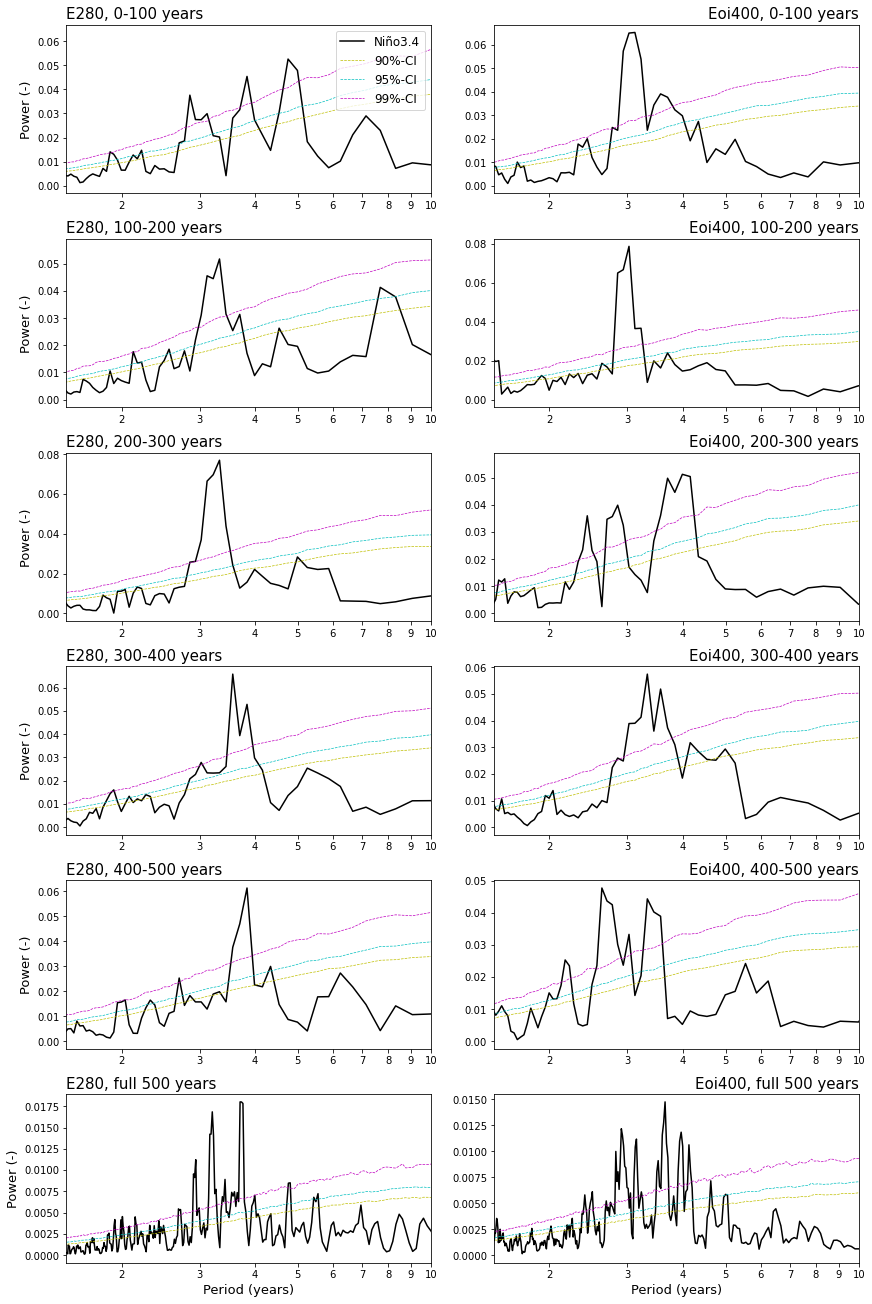

In [37]:
N = 1200
# for i in range(len(yearlist)):
#     std2_e280[i] = nino500_e280[(i*N):((i+1)*N-1)]
#     std2_eoi400[i] = nino500_eoi400[(i*N):((i+1)*N-1)]

# N_e280   = [nino100_e280, nino200_e280, nino300_e280, nino400_e280, nino500_e280]
# N_eoi400 = [nino100_eoi400, nino200_eoi400, nino300_eoi400, nino400_eoi400, nino500_eoi400]

yearlist = ['100', '200', '300', '400', '500'];
legends = ['0-100', '100-200', '200-300', '300-400', '400-500', 'full 500']

ticklocs = [2,3,4,5,6,7,8,9,10]

fig, axs = plt.subplots(nrows=6, ncols=2, figsize=(12, 18), constrained_layout=True)

norm = True; scale = True; trend = "none"; Nsur = 10000;

for i in range(len(yearlist)+1):
    
#     nino = N_e280[i]
    if i<len(yearlist):
        nino = nino500_e280[(i*N):((i+1)*N-1)]
    else:
        nino = nino500_e280

    years = legends[i]    
    
    freq, spec = MT_spectrum(nino, norm, scale, trend)
    mt_ci90, mt_ci95, mt_ci99 = Confidence_intervals(nino, norm, scale, trend, 'MT', Nsur)
    
    axs[i,0].plot(1/(12*freq), spec, 'k', label = 'Niño3.4')
    axs[i,0].plot(1/(12*freq), mt_ci90, 'y--', linewidth=0.7, alpha = 1, label = '90%-CI')
    axs[i,0].plot(1/(12*freq), mt_ci95, 'c--', linewidth=0.7, alpha = 1, label = '95%-CI')
    axs[i,0].plot(1/(12*freq), mt_ci99, 'm--', linewidth=0.7, alpha = 1, label = '99%-CI')
    axs[i,0].set_xlim([1.5,10])
    axs[i,0].set_xscale("log"); axs[i,0].set_xticks(ticklocs); axs[i,0].set_xticklabels(ticklocs);
    #axs[i,0].set_xlabel('Period (years)', fontsize=13); 
    axs[i,0].set_ylabel('Power (-)', fontsize=13)
    
    if i == 0:
        axs[i,0].legend(loc='upper right', fontsize=12)

#     nino = N_eoi400[i]
    if i<len(yearlist):
        nino = nino500_eoi400[(i*N):((i+1)*N-1)]
    else:
        nino = nino500_eoi400

    freq, spec = MT_spectrum(nino, norm, scale, trend)
    mt_ci90, mt_ci95, mt_ci99 = Confidence_intervals(nino, norm, scale, trend, 'MT', Nsur)
    
    axs[i,1].plot(1/(12*freq),spec, 'k')
    axs[i,1].plot(1/(12*freq), mt_ci90, 'y--', linewidth=0.7, alpha = 1)
    axs[i,1].plot(1/(12*freq), mt_ci95, 'c--', linewidth=0.7, alpha = 1)
    axs[i,1].plot(1/(12*freq), mt_ci99, 'm--', linewidth=0.7, alpha = 1)
    axs[i,1].set_xlim([1.5,10])    
    axs[i,1].set_xscale("log"); axs[i,1].set_xticks(ticklocs); axs[i,1].set_xticklabels(ticklocs);
    #axs[i,1].set_ylabel('Power (-)', fontsize=13)
    
    if i==len(yearlist):
        axs[i,0].set_xlabel('Period (years)', fontsize=13);
        axs[i,1].set_xlabel('Period (years)', fontsize=13);
    
    axs[i,0].set_title(f'E280, {years} years', fontsize = 15, loc='left')
    axs[i,1].set_title(f'Eoi400, {years} years', fontsize = 15, loc='right')
    
plt.savefig('figures/appendixfigure7v2.pdf', bbox_inches='tight')

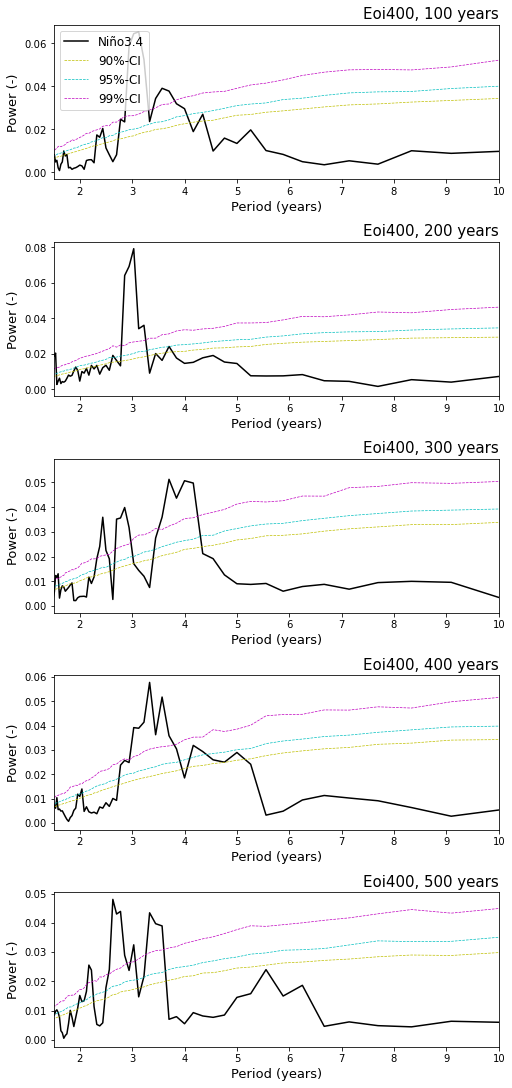

In [116]:
N=1200;

yearlist = ['100', '200', '300', '400', '500'];

fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(7, 15), constrained_layout=True)

norm = True; scale = True; trend = "none"; Nsur = 10000;

for i in range(len(yearlist)):

    years = yearlist[i]
    
    nino = nino500[i*N:((i+1)*N)]
    
    freq, spec = MT_spectrum(nino, norm, scale, trend)
    mt_ci90, mt_ci95, mt_ci99 = Confidence_intervals(nino, norm, scale, trend, 'MT', Nsur)
    
    axs[i].plot(1/(12*freq), spec, 'k', label = 'Niño3.4')
    axs[i].plot(1/(12*freq), mt_ci90, 'y--', linewidth=0.7, alpha = 1, label = '90%-CI')
    axs[i].plot(1/(12*freq), mt_ci95, 'c--', linewidth=0.7, alpha = 1, label = '95%-CI')
    axs[i].plot(1/(12*freq), mt_ci99, 'm--', linewidth=0.7, alpha = 1, label = '99%-CI')
    axs[i].set_xlim([1.5,10])
    axs[i].set_xlabel('Period (years)', fontsize=13); axs[i].set_ylabel('Power (-)', fontsize=13)
    
    if i == 0:
        axs[i].legend(loc='upper left', fontsize=12)

    nino = N_eoi400[i]
 
    axs[i].set_title(f'Eoi400, {years} years', fontsize = 15, loc='right')
    
# plt.savefig('figures/CESM2_2a.pdf', bbox_inches='tight')

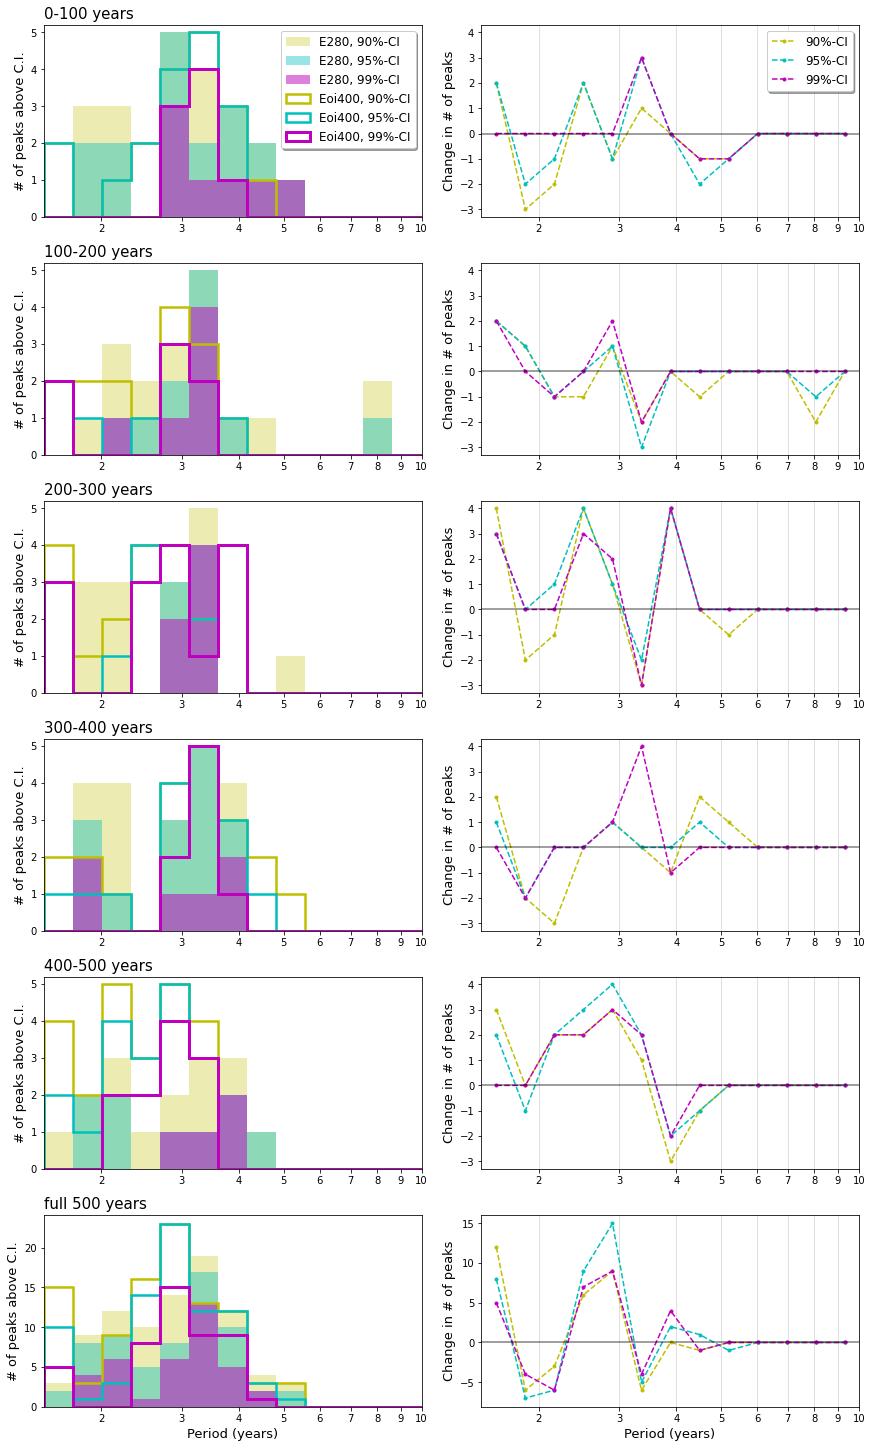

In [44]:
N = 1200

# N_e280   = [nino100_e280, nino200_e280, nino300_e280, nino400_e280, nino500_e280]
# N_eoi400 = [nino100_eoi400, nino200_eoi400, nino300_eoi400, nino400_eoi400, nino500_eoi400]

legends = ['0-100', '100-200', '200-300', '300-400', '400-500', 'full 500']

# sumpeaks90 = np.zeros((len(yearlist),2))

fig, ax = plt.subplots(nrows=6, ncols=2, figsize=(12, 20), constrained_layout=True)

norm = True; scale = True; trend = "none"; Nsur = 10000;

binlist = np.logspace(np.log10(1.5), np.log10(10), 14)
ticklocs = [2,3,4,5,6,7,8,9,10]

for i in range(len(yearlist)+1):

#     years = yearlist[i]
    years = legends[i]
    
#     nino = N_e280[i]
    if i<len(yearlist):
        nino = nino500_e280[(i*N):((i+1)*N-1)]
    else:
        nino = nino500_e280
    
    freq, spec = MT_spectrum(nino, norm, scale, trend)
    mt_ci90, mt_ci95, mt_ci99 = Confidence_intervals(nino, norm, scale, trend, 'MT', Nsur)
    
    peaks_90 = np.array([0.]); peaks_95 = np.array([0.]); peaks_99 = np.array([0.]);

    for j in range(1,len(freq)):
        period = 1.0 / freq[j] / 12.0;

        if spec[j] > mt_ci90[j]:
            peaks_90 = np.concatenate((peaks_90, np.array([period])),axis=0)
        if spec[j] > mt_ci95[j]:
            peaks_95 = np.concatenate((peaks_95, np.array([period])),axis=0)
        if spec[j] > mt_ci99[j]:
            peaks_99 = np.concatenate((peaks_99, np.array([period])),axis=0)
            
    peaks_90_1 = peaks_90[1:]; peaks_95_1 = peaks_95[1:]; peaks_99_1 = peaks_99[1:];

    ax[i,0].hist(peaks_90_1,   bins=binlist, color='y', histtype = 'stepfilled', alpha=0.3, label = 'E280, 90%-CI')
    ax[i,0].hist(peaks_95_1,   bins=binlist, color='c', histtype = 'stepfilled', alpha=0.4, label = 'E280, 95%-CI')
    ax[i,0].hist(peaks_99_1,   bins=binlist, color='m', histtype = 'stepfilled', alpha=0.5, label = 'E280, 99%-CI')
    if i<len(yearlist):
        ax[i,0].set_ylim([0, 5.2])
    
#     nino = N_eoi400[i]
    if i<len(yearlist):
        nino = nino500_eoi400[(i*N):((i+1)*N-1)]
    else:
        nino = nino500_eoi400

    freq, spec = MT_spectrum(nino, norm, scale, trend)
    mt_ci90, mt_ci95, mt_ci99 = Confidence_intervals(nino, norm, scale, trend, 'MT', Nsur)

    peaks_90 = np.array([0.]); peaks_95 = np.array([0.]); peaks_99 = np.array([0.]);

    for j in range(1,len(freq)):
        period = 1.0 / freq[j] / 12.0;

        if spec[j] > mt_ci90[j]:
            peaks_90 = np.concatenate((peaks_90, np.array([period])),axis=0)
        if spec[j] > mt_ci95[j]:
            peaks_95 = np.concatenate((peaks_95, np.array([period])),axis=0)
        if spec[j] > mt_ci99[j]:
            peaks_99 = np.concatenate((peaks_99, np.array([period])),axis=0)
            
    peaks_90_2 = peaks_90[1:]; peaks_95_2 = peaks_95[1:]; peaks_99_2 = peaks_99[1:];

    ax[i,0].hist(peaks_90_2, bins=binlist, color='y', histtype = 'step', alpha=1, linewidth=2.5, linestyle='-', label = 'Eoi400, 90%-CI')
    ax[i,0].hist(peaks_95_2, bins=binlist, color='c', histtype = 'step', alpha=1, linewidth=2.5, linestyle='-', label = 'Eoi400, 95%-CI')
    ax[i,0].hist(peaks_99_2, bins=binlist, color='m', histtype = 'step', alpha=1, linewidth=3, linestyle='-', label = 'Eoi400, 99%-CI')

    if i==0:
        ax[i,0].legend(shadow=True, fontsize = 12)
    ax[i,0].set_ylabel('# of peaks above C.I.', fontsize = 13); 
#     ax[i,0].set_xlabel('Period (years)', fontsize = 13);
    ax[i,0].set_xscale("log"); ax[i,0].set_xticks(ticklocs); ax[i,0].set_xticklabels(ticklocs); ax[i,0].set_xlim([1.5,10])
    
    ax[i,0].set_title(f'{years} years', loc='left', fontsize =15)

    bincenters = np.array([0.])
    for k in range(len(binlist)-1):
        center = (binlist[k] + binlist[k+1])/2.
        bincenters = np.concatenate((bincenters, np.array([center])),axis=0)
    bincenters = bincenters[1:]

    hist1, _ = np.histogram(peaks_90_1,   bins=binlist)
    hist2, _ = np.histogram(peaks_90_2, bins=binlist)
    diff_90 = hist2 - hist1
#     sumpeaks90[i,0] = np.sum(hist1); sumpeaks90[i,1] = np.sum(hist2)

    hist1, _ = np.histogram(peaks_95_1,   bins=binlist)
    hist2, _ = np.histogram(peaks_95_2, bins=binlist)
    diff_95 = hist2 - hist1

    hist1, _ = np.histogram(peaks_99_1,   bins=binlist)
    hist2, _ = np.histogram(peaks_99_2, bins=binlist)
    diff_99 = hist2 - hist1

    ax[i,1].plot(bincenters, diff_90, color='y', marker='.', linestyle = '--')
    ax[i,1].plot(bincenters, diff_95, color='c', marker='.', linestyle = '--')
    ax[i,1].plot(bincenters, diff_99, color='m', marker='.', linestyle = '--')
    if i<len(yearlist):
        ax[i,1].set_ylim([-3.3, 4.3])

    ax[i,1].set_ylabel('Change in # of peaks', fontsize = 13); 
#     ax[i,1].set_xlabel('Period (years)', fontsize = 13);
    ax[i,1].set_xscale("log"); ax[i,1].set_xticks(ticklocs); ax[i,1].set_xticklabels(ticklocs); ax[i,1].set_xlim([1.5,10])
    ax[i,1].xaxis.grid(alpha=0.5, zorder=-1)
    ax[i,1].axhline(0, color='black', alpha = 0.5);
    if i == 0:
        ax[i,1].legend(['90%-CI', '95%-CI', '99%-CI'], shadow=True, loc='upper right', fontsize = 12);
        
    if i==len(yearlist):
        ax[i,0].set_xlabel('Period (years)', fontsize = 13);
        ax[i,1].set_xlabel('Period (years)', fontsize = 13);

plt.savefig('figures/appendixfigure8.pdf', bbox_inches='tight')

(50.0, 150.0)

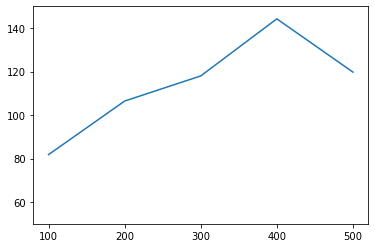

In [148]:
# plt.plot(yearlist,sumpeaks90[:,0], label='E280')
# plt.plot(yearlist,sumpeaks90[:,1], label='Eoi400')
# plt.legend()

plt.plot(yearlist,100*sumpeaks90[:,1]/sumpeaks90[:,0])
plt.ylim([50, 150])